# Generación de modelos de aprendizaje

In [91]:
# librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importar el data set
dataset = pd.read_excel('database.xlsx')
dataset.head(10)

,City,Number of floors,Total built area,Total roof area,Type of school,Number of students,Number of staff,Age of building,Number of classrooms,Total air-conditioned area,AC Capacity,Annual consumption
0,1,3,4275.00,1425.00,1,190,16,31,7,409.5,200.0,481798.80
1,1,3,2622.00,874.00,2,541,23,40,19,1111.5,200.0,525145.95
2,1,3,4275.00,1425.00,3,537,33,31,17,994.5,200.0,481798.80
3,1,3,3938.40,1312.80,2,485,52,39,22,1287.0,144.0,342312.75
4,1,3,3938.40,1312.80,3,106,13,39,3,175.5,226.0,556152.75
5,1,3,4275.00,1425.00,1,107,9,34,4,234.0,200.0,481798.80
6,1,2,1634.40,817.20,4,229,15,36,10,585.0,74.0,155407.95
7,1,3,4275.00,1425.00,3,204,19,34,10,585.0,200.0,481798.80
8,1,3,3534.00,1178.00,2,229,31,39,5,585.0,184.0,410741.55
9,1,1,360.63,360.63,1,140,15,36,5,292.5,86.0,182048.85


In [92]:
dataset.describe()

,City,Number of floors,Total built area,Total roof area,Type of school,Number of students,Number of staff,Age of building,Number of classrooms,Total air-conditioned area,AC Capacity,Annual consumption
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,3.255682,2.596591,4165.627699,1524.457187,3.289773,381.102273,28.176136,32.823864,14.258523,817.708807,160.115057,410968.041264
std,2.214295,0.591285,1902.622927,649.169503,0.912782,217.567439,13.010962,9.353318,6.121624,354.602865,55.815582,143405.258784
min,1.000000,1.000000,360.630000,360.630000,1.000000,10.000000,0.000000,11.000000,2.000000,117.000000,38.000000,99274.950000
25%,1.000000,2.000000,2622.000000,1178.000000,3.000000,229.000000,19.000000,24.000000,10.000000,585.000000,134.000000,342312.750000
50%,3.000000,3.000000,4275.000000,1425.000000,4.000000,366.000000,28.000000,35.000000,13.000000,760.500000,172.000000,470037.600000
75%,5.000000,3.000000,5940.000000,1980.000000,4.000000,494.500000,37.000000,39.000000,18.000000,1053.000000,200.000000,481798.800000
max,9.000000,3.000000,6900.000000,3078.000000,4.000000,1259.000000,76.000000,58.000000,40.000000,2340.000000,250.000000,683191.800000


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        352 non-null    int64  
 1   Number of floors            352 non-null    int64  
 2   Total built area            352 non-null    float64
 3   Total roof area             352 non-null    float64
 4   Type of school              352 non-null    int64  
 5   Number of students          352 non-null    int64  
 6   Number of staff             352 non-null    int64  
 7   Age of building             352 non-null    int64  
 8   Number of classrooms        352 non-null    int64  
 9   Total air-conditioned area  352 non-null    float64
 10  AC Capacity                 352 non-null    float64
 11  Annual consumption          352 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 33.1 KB


In [94]:
dataset.shape

(352, 12)

## Modelos a utilizar:

<ul>
<li>Decision Tree</li>
<li>KNN</li> 
<li>LSTM</li>
<li>Gradient Boosting</li>
<li>Support Vector Regression</li>
</ul>

## Entrenar modelos y mostrar resultados

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
# Models to use: Decision Tree, KNN, LSTM, GradienBoosting, Support Vector Machine.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
# MSE, R2, MAE, RMSE, SSE, MAPE, MPE.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler


# Variables de decisión y variable a predecir
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

# Escalado de variables
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# División en conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Definir modelos
modelos = {
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
}

# Entrenar y evaluar modelos
resultados = []
resultados_entrenamiento = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train.ravel())  # ravel() para evitar warnings en algunos modelos
    y_pred = modelo.predict(X_test)
    resultados.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),

    })
    y_pred_entrenamiento = modelo.predict(X_train)
    resultados_entrenamiento.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(y_train, y_pred_entrenamiento),
        'R2': r2_score(y_train, y_pred_entrenamiento),
        'MAE': mean_absolute_error(y_train, y_pred_entrenamiento),
        'RMSE': root_mean_squared_error(y_train, y_pred_entrenamiento),
        'MAPE': mean_absolute_percentage_error(y_train, y_pred_entrenamiento),
    })
    print(f"{nombre}: R2={resultados[-1]['R2']:.4f}, MSE={resultados[-1]['MSE']:.4f}, MAE={resultados[-1]['MAE']:.4f}, RMSE={resultados[-1]['RMSE']:.4f}, MAPE={resultados[-1]['MAPE']:.4f}")

# TensorFlow LSTM
LSTM = tf.keras.models.Sequential()
LSTM.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM.add(tf.keras.layers.LSTM(units=50))
LSTM.add(tf.keras.layers.Dense(units=1))
LSTM.compile(optimizer='adam', loss='mean_squared_error')
X_train_LSTM = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
LSTM.fit(X_train_LSTM, y_train, epochs=100, batch_size=32)
y_pred_LSTM = LSTM.predict(X_test_LSTM)
y_pred_LSTM = scaler_y.inverse_transform(y_pred_LSTM)

resultados.append({
    'Modelo': 'LSTM',
    'MSE': mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_LSTM),
    'R2': r2_score(scaler_y.inverse_transform(y_test), y_pred_LSTM),
    'MAE': mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred_LSTM),
    'RMSE': root_mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_LSTM),
    'MAPE': mean_absolute_percentage_error(scaler_y.inverse_transform(y_test), y_pred_LSTM),
})
y_pred_entrenamiento_LSTM = LSTM.predict(X_train_LSTM)
y_pred_entrenamiento_LSTM = scaler_y.inverse_transform(y_pred_entrenamiento_LSTM)
resultados_entrenamiento.append({
    'Modelo': 'LSTM',
    'MSE': mean_squared_error(scaler_y.inverse_transform(y_train), y_pred_entrenamiento_LSTM),
    'R2': r2_score(scaler_y.inverse_transform(y_train), y_pred_entrenamiento_LSTM),
    'MAE': mean_absolute_error(scaler_y.inverse_transform(y_train), y_pred_entrenamiento_LSTM),
    'RMSE': root_mean_squared_error(scaler_y.inverse_transform(y_train), y_pred_entrenamiento_LSTM),
    'MAPE': mean_absolute_percentage_error(scaler_y.inverse_transform(y_train), y_pred_entrenamiento_LSTM),
})
print(f"LSTM: R2={resultados[-1]['R2']:.4f}, MSE={resultados[-1]['MSE']:.4f}, MAE={resultados[-1]['MAE']:.4f}, RMSE={resultados[-1]['RMSE']:.4f}, MAPE={resultados[-1]['MAPE']:.4f}")


# Convertir resultados en DataFrame
resultados_df = pd.DataFrame(resultados).sort_values(by='R2', ascending=False)
resultados_df_entrenamiento = pd.DataFrame(resultados_entrenamiento).sort_values(by='R2', ascending=False)


Decision Tree: R2=0.9790, MSE=0.0009, MAE=0.0075, RMSE=0.0307, MAPE=0.0128
Gradient Boosting: R2=0.9806, MSE=0.0009, MAE=0.0096, RMSE=0.0295, MAPE=0.0213
Support Vector Machine: R2=0.9106, MSE=0.0040, MAE=0.0539, RMSE=0.0633, MAPE=0.1652
K-Nearest Neighbors: R2=0.8700, MSE=0.0058, MAE=0.0417, RMSE=0.0764, MAPE=0.1408


AttributeError: module 'tensorflow' has no attribute 'keras'

In [ ]:
resultados_df.head()

,Modelo,MSE,R2,MAE,RMSE,MAPE
1,Gradient Boosting,0.000871,0.980579,0.009602,0.029515,0.021383
0,Decision Tree,0.000941,0.979021,0.007499,0.030676,0.012815
2,Support Vector Machine,0.004010,0.910600,0.053900,0.063325,0.165175
3,K-Nearest Neighbors,0.005832,0.869976,0.041713,0.076370,0.140811


## Evaluación de modelos de aprendizaje

## Resultados sobre datos de prueba

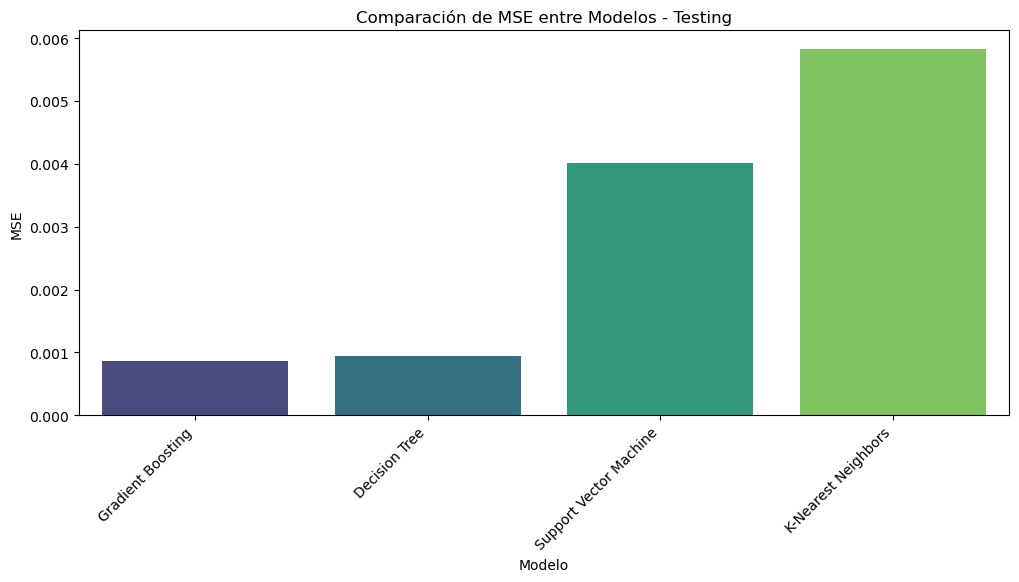

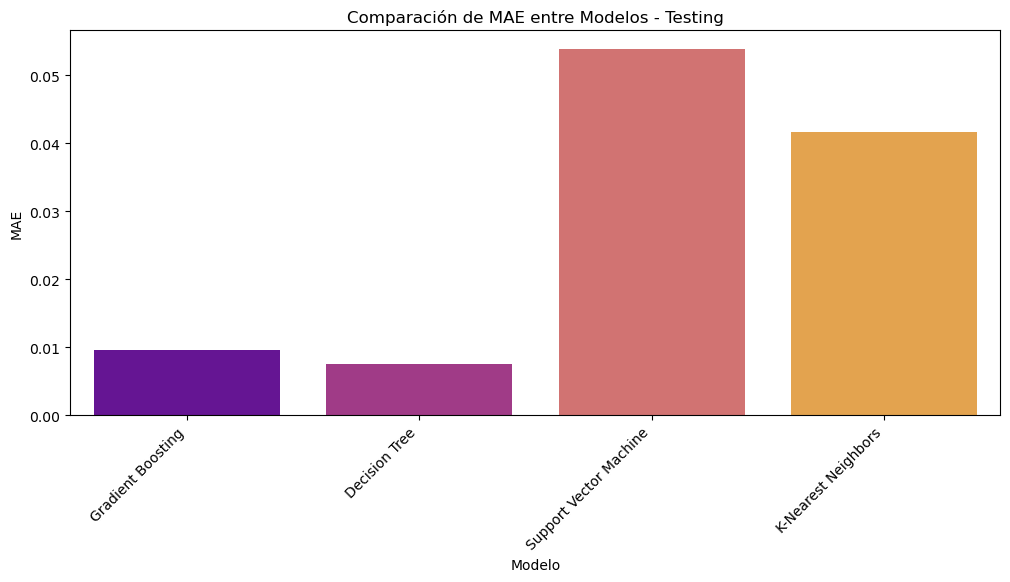

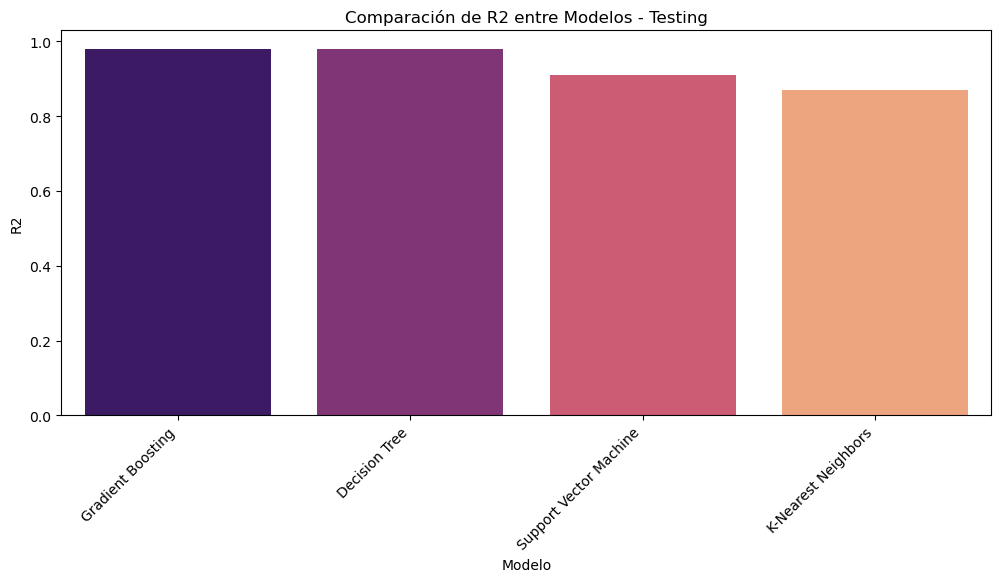

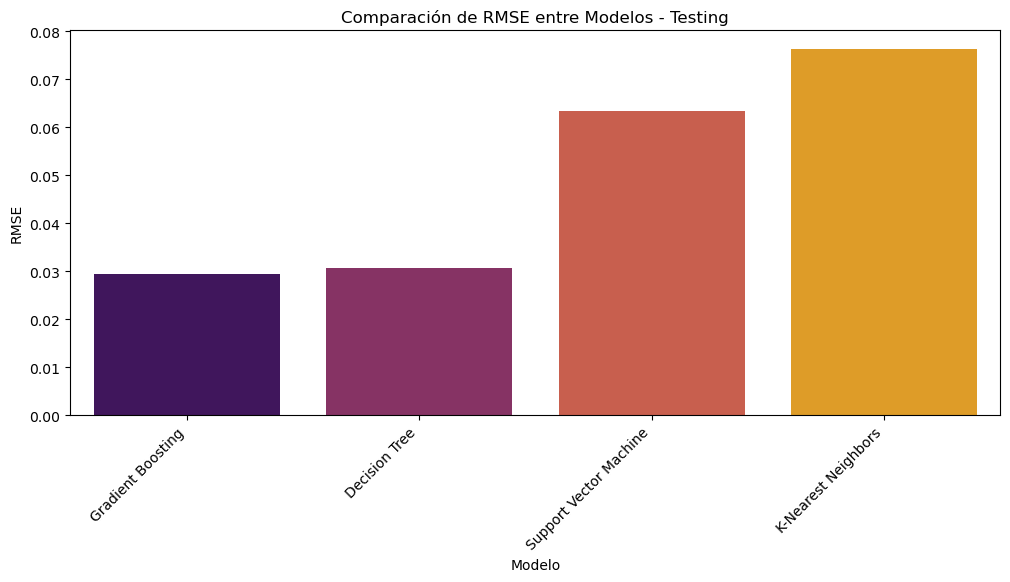

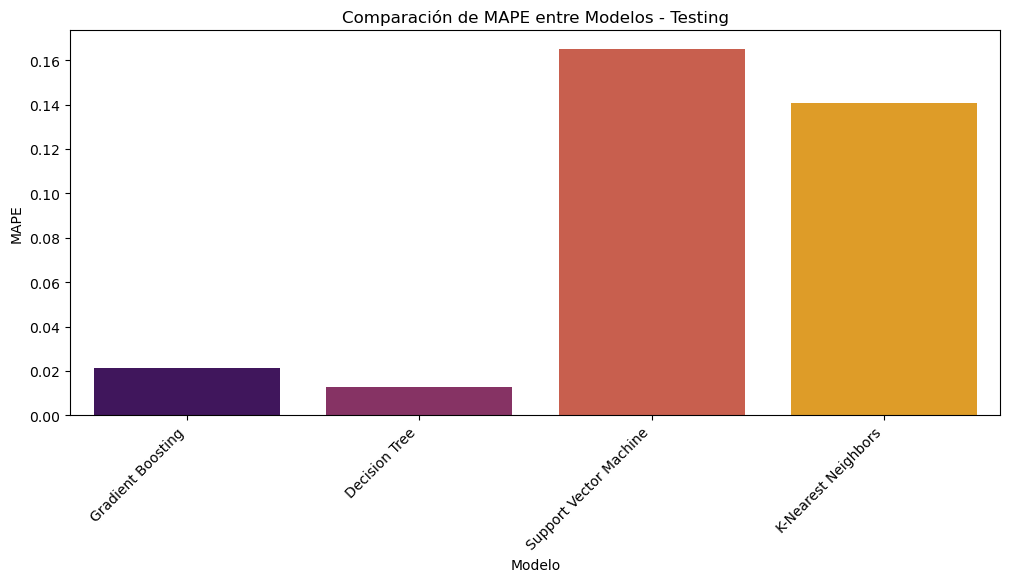

In [ ]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Testing')
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAPE', data=resultados_df, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAPE entre Modelos - Testing')
plt.show()

## Resultados sobre datos de entrenamiento

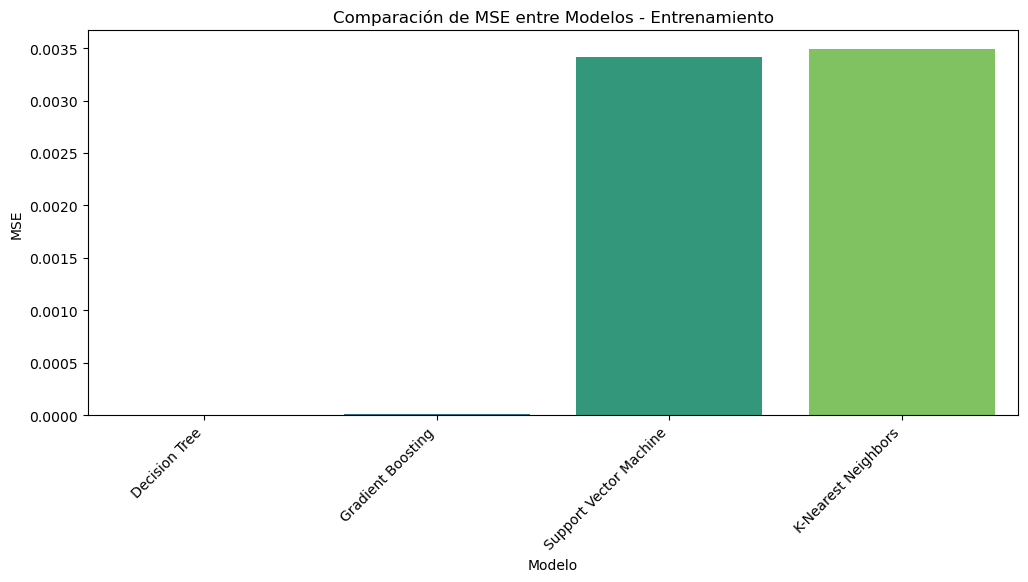

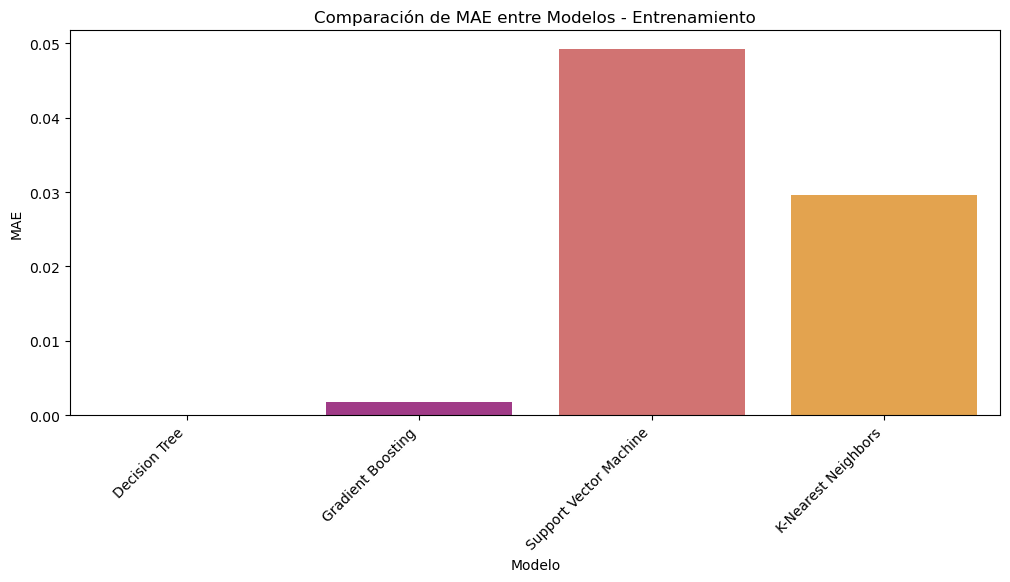

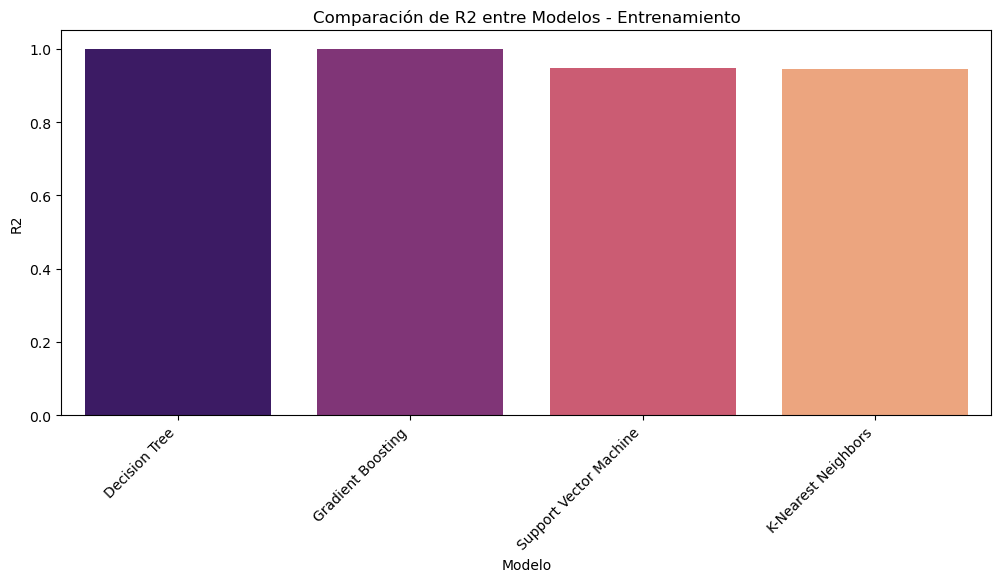

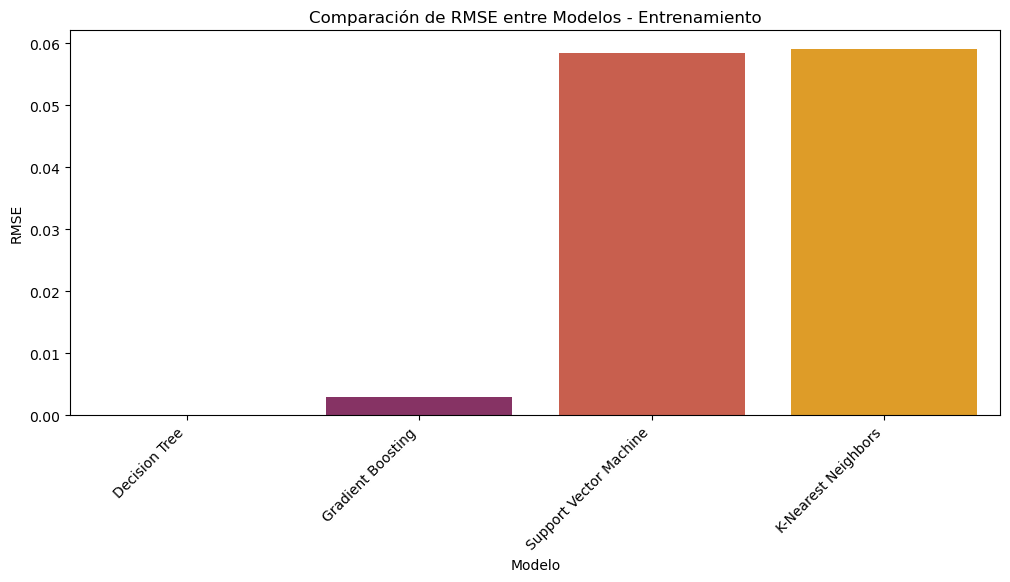

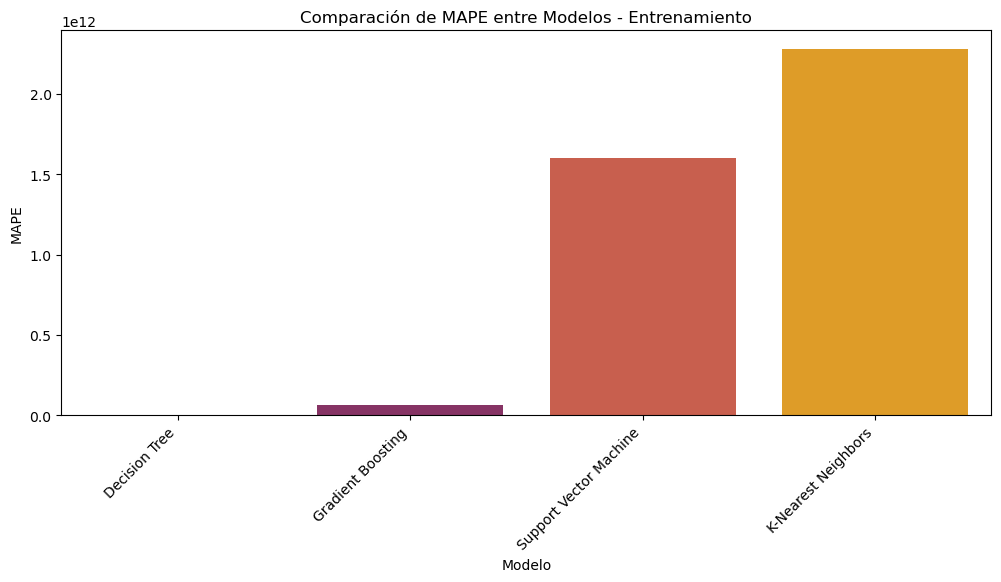

In [ ]:
# Gráficos
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', data=resultados_df_entrenamiento, palette='viridis', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', data=resultados_df_entrenamiento, palette='plasma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', data=resultados_df_entrenamiento, palette='magma', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', data=resultados_df_entrenamiento, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos - Entrenamiento')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAPE', data=resultados_df_entrenamiento, palette='inferno', hue='Modelo')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAPE entre Modelos - Entrenamiento')
plt.show()

## Validación cruzada

In [ ]:
# Validación cruzada 
cv_r2_resultados = []
cv_mse_resultados = []
cv_mae_resultados = []
cv_rmse_resultados = []
cv_mape_resultados = []
for nombre, modelo in modelos.items():
    r2_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='r2')
    mse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error')
    mape_scores = cross_val_score(modelo, X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_r2_resultados.append({
        'Modelo': nombre,
        'R2 Medio': r2_scores.mean(),
        'R2 Std': r2_scores.std()
    })
    cv_mse_resultados.append({
        'Modelo': nombre,
        'MSE Medio': mse_scores.mean(),
        'MSE Std': mse_scores.std()
    })
    cv_mae_resultados.append({
        'Modelo': nombre,
        'MAE Medio': mae_scores.mean(),
        'MAE Std': mae_scores.std()
    })
    cv_rmse_resultados.append({
        'Modelo': nombre,
        'RMSE Medio': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    })
    cv_mape_resultados.append({
        'Modelo': nombre,
        'MAPE Medio': mape_scores.mean(),
        'MAPE Std': mape_scores.std()
    })
    print(f"{nombre}: R2 Medio={r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

# Convertir resultados en DataFrame
cv_r2_resultados_df = pd.DataFrame(cv_r2_resultados).sort_values(by='R2 Medio', ascending=False)
cv_mse_resultados_df = pd.DataFrame(cv_mse_resultados).sort_values(by='MSE Medio', ascending=False)
cv_mae_resultados_df = pd.DataFrame(cv_mae_resultados).sort_values(by='MAE Medio', ascending=False)
cv_rmse_resultados_df = pd.DataFrame(cv_rmse_resultados).sort_values(by='RMSE Medio', ascending=False)
cv_mape_resultados_df = pd.DataFrame(cv_mape_resultados).sort_values(by='MAPE Medio', ascending=False)


Decision Tree: R2 Medio=0.9904 (+/- 0.0074)
Gradient Boosting: R2 Medio=0.9883 (+/- 0.0119)
Support Vector Machine: R2 Medio=0.9082 (+/- 0.0308)
K-Nearest Neighbors: R2 Medio=0.8964 (+/- 0.0467)


### Resultados validación cruzada

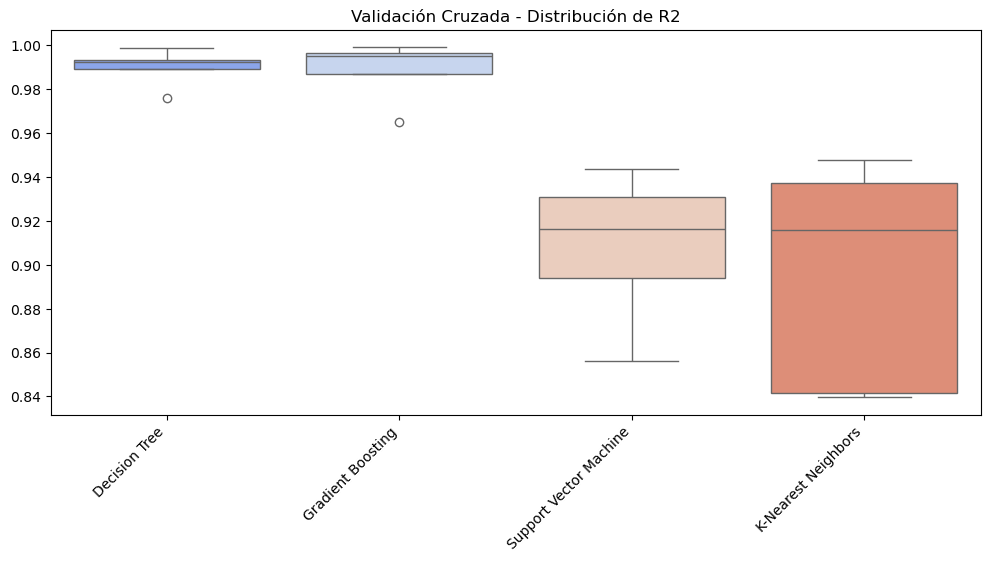

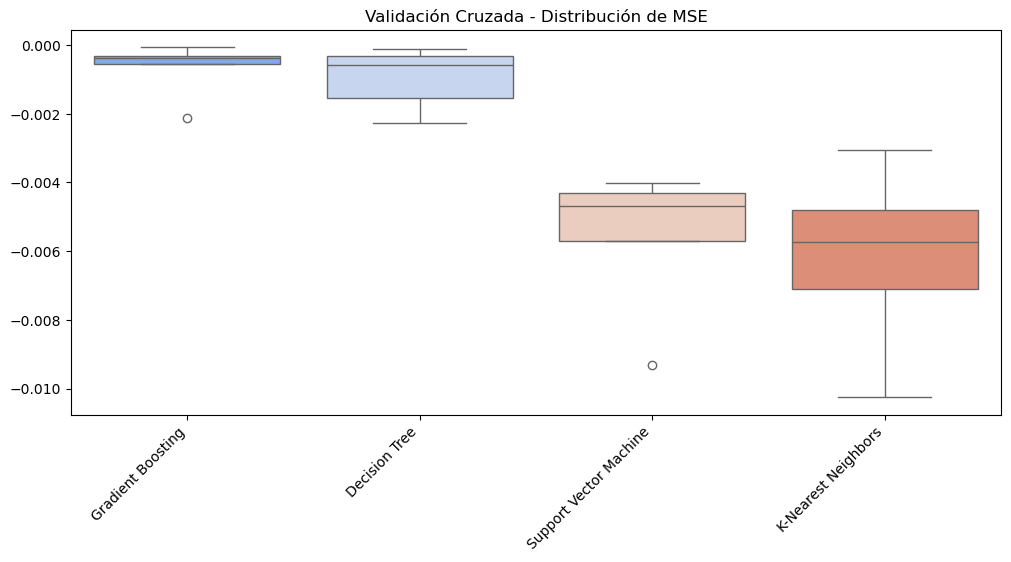

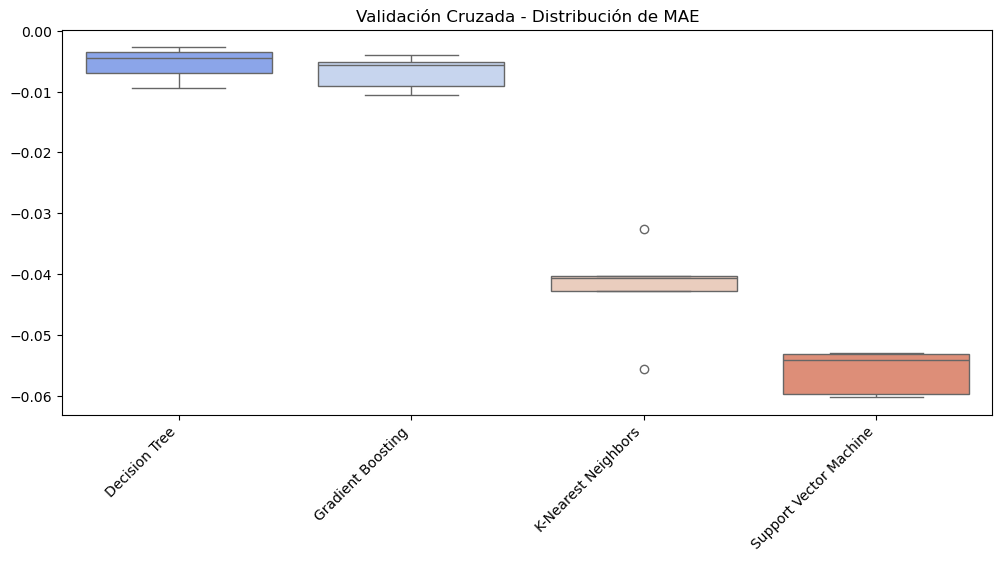

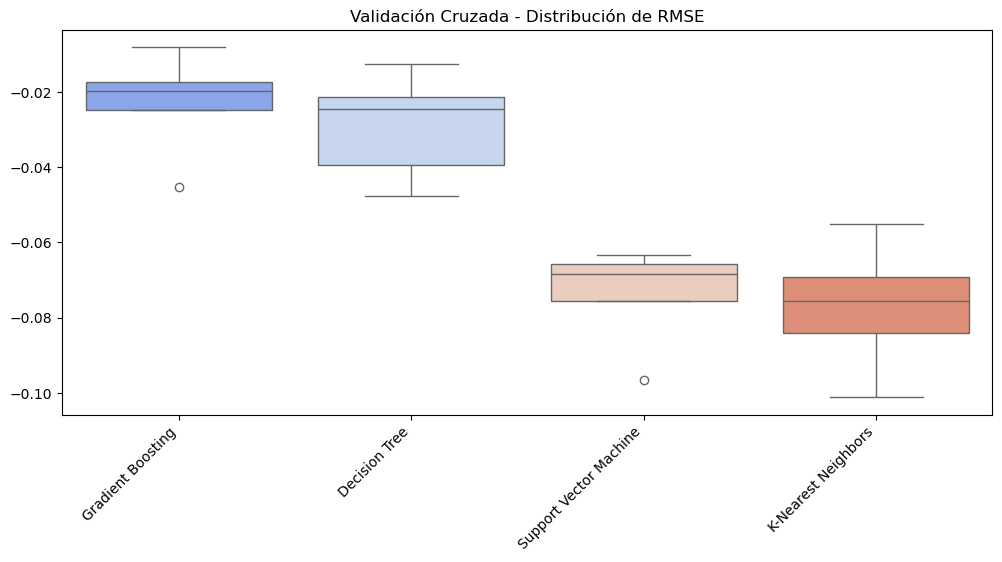

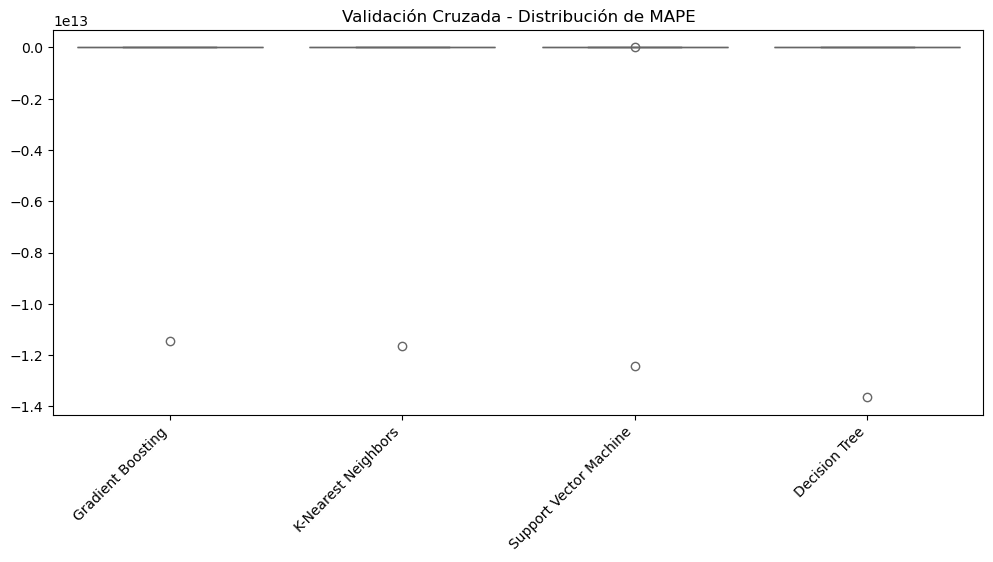

In [ ]:
# Gráfico de validación cruzada de boxplot

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='r2') for n in cv_r2_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_r2_resultados_df['Modelo'])), cv_r2_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de R2')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error') for n in cv_mse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mse_resultados_df['Modelo'])), cv_mse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MSE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error') for n in cv_mae_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mae_resultados_df['Modelo'])), cv_mae_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MAE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_root_mean_squared_error') for n in cv_rmse_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_rmse_resultados_df['Modelo'])), cv_rmse_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de RMSE')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=[cross_val_score(modelos[n], X_train, y_train.ravel(), cv=5, scoring='neg_mean_absolute_percentage_error') for n in cv_mape_resultados_df['Modelo']],
            palette='coolwarm')
plt.xticks(range(len(cv_mape_resultados_df['Modelo'])), cv_mape_resultados_df['Modelo'], rotation=45, ha="right")
plt.title('Validación Cruzada - Distribución de MAPE')
plt.show()

## Ajuste de hiperparametros
Se seleccionaron los modelos Ridge regression y gradient boosting por su desempeños en las metricas presentadas

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros para Decision Tree, KNN, LSTM, GradienBoosting, Support Vector Machine.

parametros_decision_tree = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

parametros_gradient_boosting = {

    'n_estimators': [100, 400],
    'subsample': [1.0, 0.5, 0.75],
    'max_depth': [3, 5, 20],
    'max_features': [None, 'sqrt', 'log2'],
}

parametros_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100],
}

parametros_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': [ 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
}

parametros_xgboost = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 20]
}

# GridSearchCV para Decision Tree
print("Decision Tree")
grid_decision_tree = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parametros_decision_tree, scoring='r2', cv=5)
grid_decision_tree.fit(X_train, y_train.ravel())
mejores_parametros_decision_tree = grid_decision_tree.best_params_
mejor_resultado_decision_tree = grid_decision_tree.best_score_

# GridSearchCV para Gradient Boosting
print("Gradient Boosting")
grid_gradient_boosting = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parametros_gradient_boosting, scoring='r2', cv=5)
grid_gradient_boosting.fit(X_train, y_train.ravel())
mejores_parametros_gradient_boosting = grid_gradient_boosting.best_params_
mejor_resultado_gradient_boosting = grid_gradient_boosting.best_score_

# GridSearchCV para Support Vector Machine
print("Support Vector Machine")
grid_svm = GridSearchCV(estimator=SVR(), param_grid=parametros_svm, scoring='r2', cv=5)
grid_svm.fit(X_train, y_train.ravel())
mejores_parametros_svm = grid_svm.best_params_
mejor_resultado_svm = grid_svm.best_score_

# GridSearchCV para K-Nearest Neighbors
print("K-Nearest Neighbors")
grid_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=parametros_knn, scoring='r2', cv=5)
grid_knn.fit(X_train, y_train.ravel())
mejores_parametros_knn = grid_knn.best_params_
mejor_resultado_knn = grid_knn.best_score_

print(f"Decision Tree: {mejores_parametros_decision_tree}, {mejor_resultado_decision_tree:.4f}")
print(f"Gradient Boosting: {mejores_parametros_gradient_boosting}, {mejor_resultado_gradient_boosting:.4f}")
print(f"Support Vector Machine: {mejores_parametros_svm}, {mejor_resultado_svm:.4f}")
print(f"K-Nearest Neighbors: {mejores_parametros_knn}, {mejor_resultado_knn:.4f}")

# Optmización de hiperparámetros para LSTM
def crear_modelo(units, optimizer):
    LSTM = tf.keras.models.Sequential()
    LSTM.add(tf.keras.layers.LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    LSTM.add(tf.keras.layers.LSTM(units=units))
    LSTM.add(tf.keras.layers.Dense(units=1))
    LSTM.compile(optimizer=optimizer, loss='mean_squared_error')
    return LSTM

parametros_LSTM = {
    'units': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
}

grid_LSTM = GridSearchCV(estimator=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=crear_modelo, verbose=0),
                            param_grid=parametros_LSTM, scoring='r2', cv=5)
grid_LSTM.fit(X_train_LSTM, y_train)
mejores_parametros_LSTM = grid_LSTM.best_params_
mejor_resultado_LSTM = grid_LSTM.best_score_

print(f"LSTM: {mejores_parametros_LSTM}, {mejor_resultado_LSTM:.4f}")



Decision Tree
Gradient Boosting
Support Vector Machine
K-Nearest Neighbors
Decision Tree: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}, 0.9910
Gradient Boosting: {'max_depth': 20, 'max_features': None, 'n_estimators': 400, 'subsample': 0.5}, 0.9913
Support Vector Machine: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'}, 0.9462
K-Nearest Neighbors: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}, 0.9138


In [ ]:
# Desempeño del modelo con los mejores hiperparámetros
gradientBoosting_best = GradientBoostingRegressor(**mejores_parametros_gradient_boosting)
gradientBoosting_best.fit(X_train, y_train.ravel())
y_pred = gradientBoosting_best.predict(X_test)

# Guardar resultados en data frame Modelo	MSE	R2	MAE	RMSE	MAPE
resultados_optimizados = []
resultados_optimizados.append({
    'Modelo': 'Gradient Boosting',
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
})

# Desempeño del modelo con los mejores hiperparámetros
svm_best = SVR(**mejores_parametros_svm)
svm_best.fit(X_train, y_train.ravel())
y_pred = svm_best.predict(X_test)

resultados_optimizados.append({
    'Modelo': 'Support Vector Machine',
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
})

# Desempeño del modelo con los mejores hiperparámetros
knn_best = KNeighborsRegressor(**mejores_parametros_knn)
knn_best.fit(X_train, y_train.ravel())
y_pred = knn_best.predict(X_test)

resultados_optimizados.append({
    'Modelo': 'K-Nearest Neighbors',
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
})

decisionTree_best = DecisionTreeRegressor(**mejores_parametros_decision_tree)
decisionTree_best.fit(X_train, y_train.ravel())
y_pred = decisionTree_best.predict(X_test)

resultados_optimizados.append({
    'Modelo': 'Decision Tree',
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred),
})

LSTM_best = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=crear_modelo, verbose=0, **mejores_parametros_LSTM)
LSTM_best.fit(X_train_LSTM, y_train)
y_pred = LSTM_best.predict(X_test_LSTM)
y_pred = scaler_y.inverse_transform(y_pred)

resultados_optimizados.append({
    'Modelo': 'LSTM',
    'MSE': mean_squared_error(scaler_y.inverse_transform(y_test), y_pred),
    'R2': r2_score(scaler_y.inverse_transform(y_test), y_pred),
    'MAE': mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred),
    'RMSE': root_mean_squared_error(scaler_y.inverse_transform(y_test), y_pred),
    'MAPE': mean_absolute_percentage_error(scaler_y.inverse_transform(y_test), y_pred),
})

resultados_optimizados_df = pd.DataFrame(resultados_optimizados).sort_values(by='R2', ascending=False)

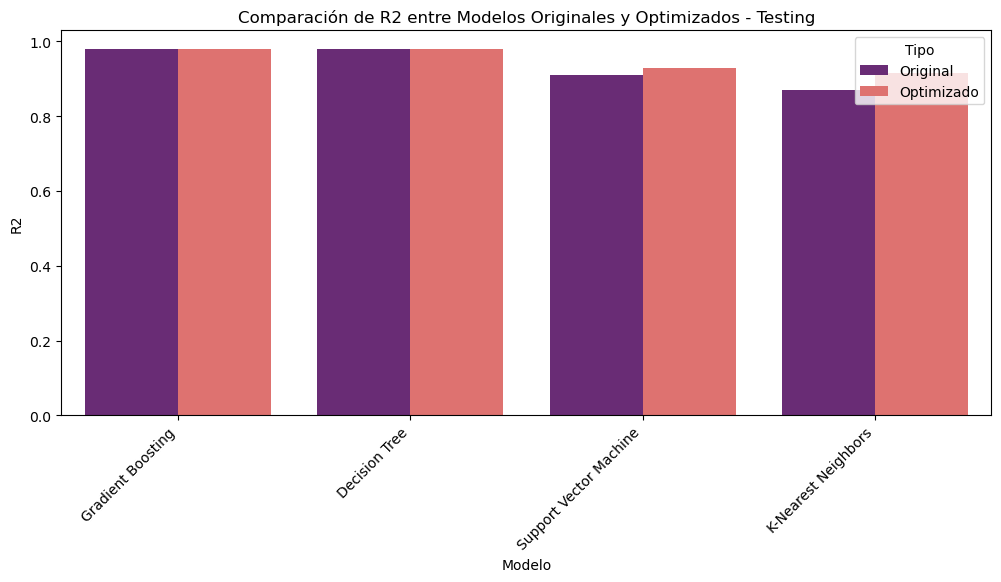

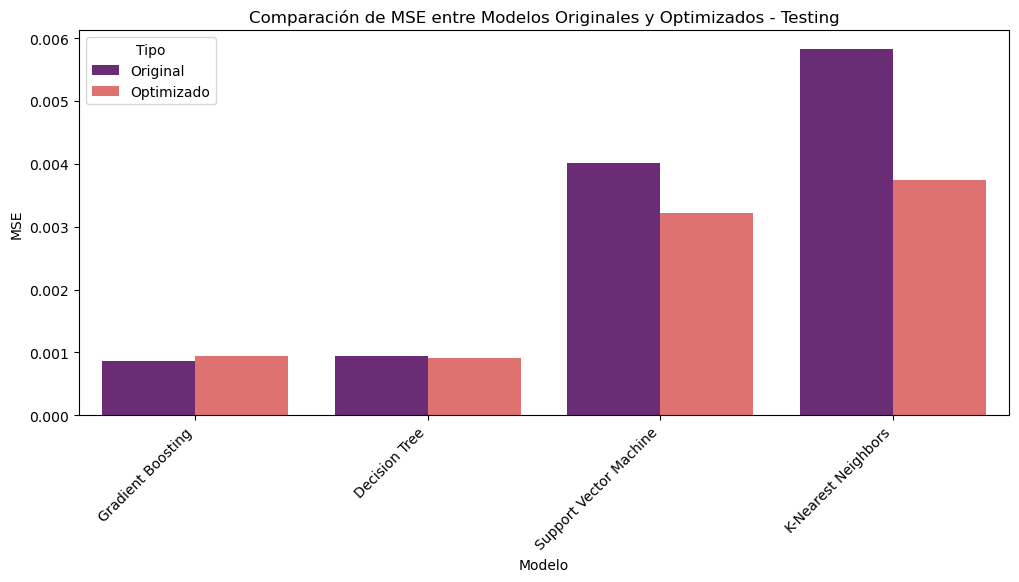

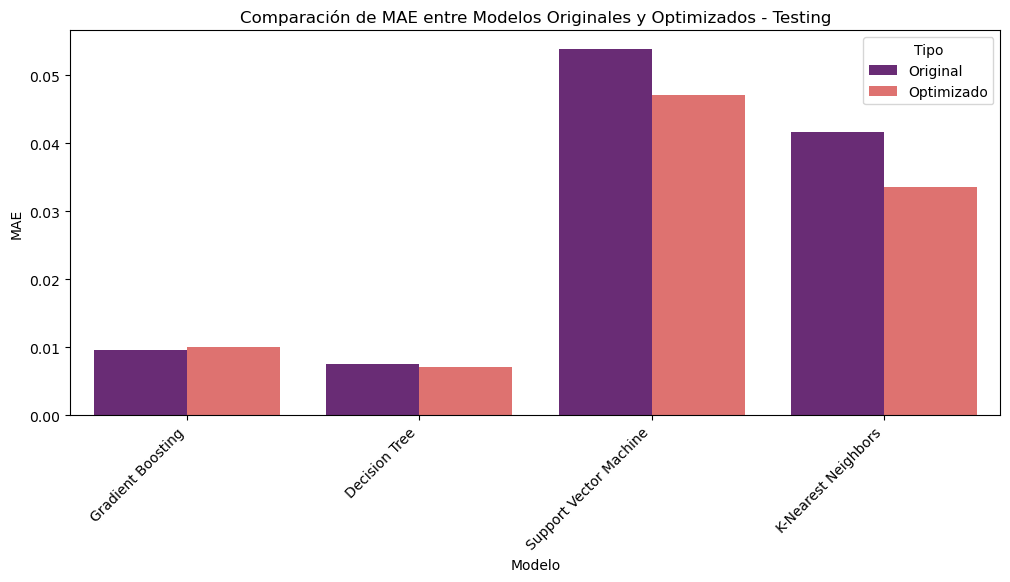

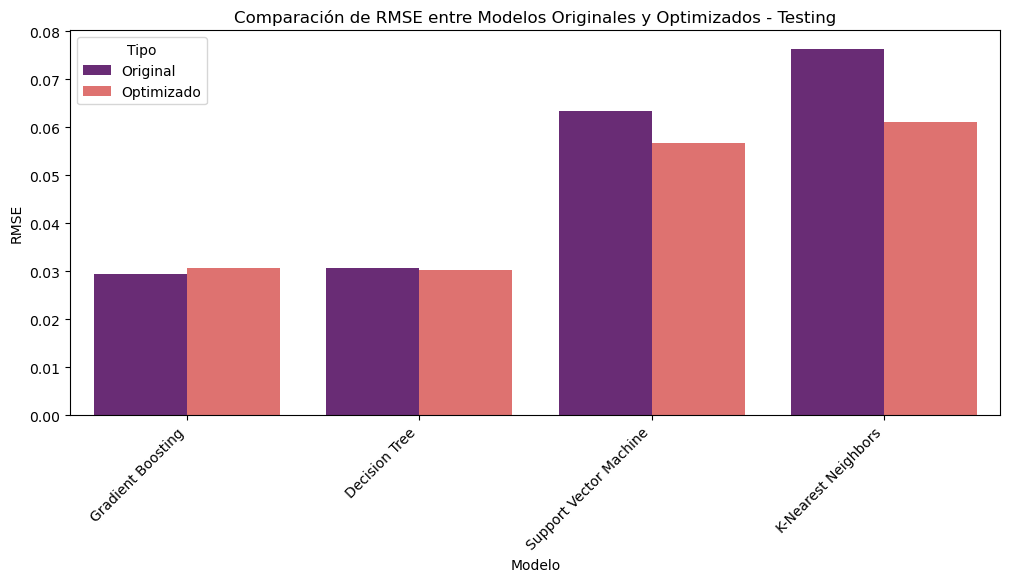

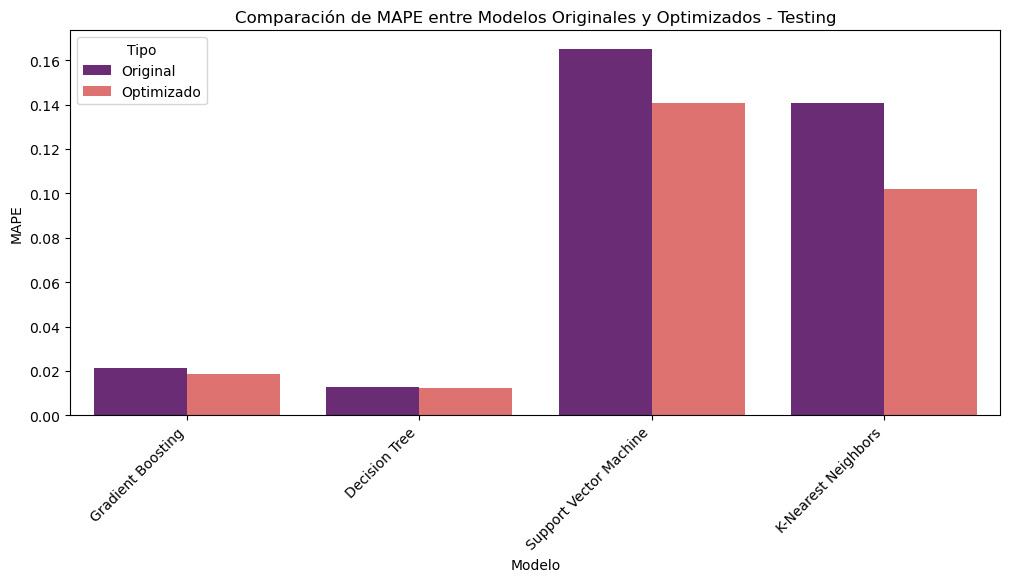

In [ ]:
# Comparar resultados de resultados_df y resultados_optimizados_df con grafico de barras comparativo

# Unir los DataFrames para comparación
resultados_comparacion = pd.concat([resultados_df.assign(Tipo='Original'), resultados_optimizados_df.assign(Tipo='Optimizado')])

# Gráfico comparativo
plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='R2', hue='Tipo', data=resultados_comparacion, palette='magma')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de R2 entre Modelos Originales y Optimizados - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MSE', hue='Tipo', data=resultados_comparacion, palette='magma')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MSE entre Modelos Originales y Optimizados - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAE', hue='Tipo', data=resultados_comparacion, palette='magma')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAE entre Modelos Originales y Optimizados - Testing')
plt.show()  

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='RMSE', hue='Tipo', data=resultados_comparacion, palette='magma')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de RMSE entre Modelos Originales y Optimizados - Testing')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Modelo', y='MAPE', hue='Tipo', data=resultados_comparacion, palette='magma')
plt.xticks(rotation=45, ha="right")
plt.title('Comparación de MAPE entre Modelos Originales y Optimizados - Testing')
plt.show()
